![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Calculate ET from LE
</b>
</span>

---
**Notebook version**: `1` (24 Mar 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- Calculate evapotranspiration (ET in `mm h-1`) from latent heat flux (LE in `W m-2`)

</br>

# **Imports**

In [1]:
import diive as dv

import importlib.metadata
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from diive.configs.exampledata import load_exampledata_EDDYPRO_FLUXNET_CSV_30MIN
from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # Used for plotting

warnings.filterwarnings("ignore")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Docstring**

In [2]:
help(dv.et_from_le)

Help on function et_from_le in module diive.pkgs.createvar.conversions:

et_from_le(le: pandas.core.series.Series, ta: pandas.core.series.Series) -> pandas.core.series.Series
    Convert latent heat flux (energy) to evapotranspiration (mass).
    
    Kudos:
        Based on code of the R package 'bigleaf':
        https://rdrr.io/cran/bigleaf/src/R/unit_conversions.r (LE.to.ET)
    
    Args:
        le: latent heat flux (W m-2)
        ta: air temperature (°C)
    
    Returns:
        Evapotranspiration (mm H2O h-1)



</br>

# **Load example data**
- Example data is from the EddyPro *_fluxnet_* output file

In [3]:
df, meta = load_exampledata_EDDYPRO_FLUXNET_CSV_30MIN()
le = df['LE'].copy()
ta = df['TA_1_1_1'].copy()
et_from_ep = df['ET'].copy()  # This is ET (in mm h-1) calculated by EddyPro, here it is used as the reference for comparison
et_from_ep.name = "ET_from_EddyPro"

Reading file exampledata_EDDYPRO-FLUXNET-CSV-30MIN_CH-AWS_2022.07_FR-20220127-164245_eddypro_fluxnet_2022-01-28T112538_adv.csv ...


</br>

# **Calculate ET from LE**
- ET is returned in `mm h-1`

In [4]:
et = dv.et_from_le(le=le, ta=ta)
et

TIMESTAMP_MIDDLE
2021-07-01 00:15:00    0.009692
2021-07-01 00:45:00   -0.000248
2021-07-01 01:15:00   -0.001500
2021-07-01 01:45:00   -0.000454
2021-07-01 02:15:00    0.002339
                         ...   
2021-07-31 21:45:00    0.006962
2021-07-31 22:15:00    0.007132
2021-07-31 22:45:00   -0.001279
2021-07-31 23:15:00   -0.061960
2021-07-31 23:45:00    0.098757
Freq: 30min, Length: 1488, dtype: float64

</br>

</br>

# **Compare results with ET from EddyPro**

In [5]:
et.describe()

count    811.000000
mean       0.147515
std        0.228631
min       -0.400439
25%        0.001864
50%        0.026590
75%        0.231872
max        1.361894
dtype: float64

In [6]:
et_from_ep.describe()

count    811.000000
mean       0.147403
std        0.228458
min       -0.400135
25%        0.001863
50%        0.026570
75%        0.231694
max        1.360860
Name: ET_from_EddyPro, dtype: float64

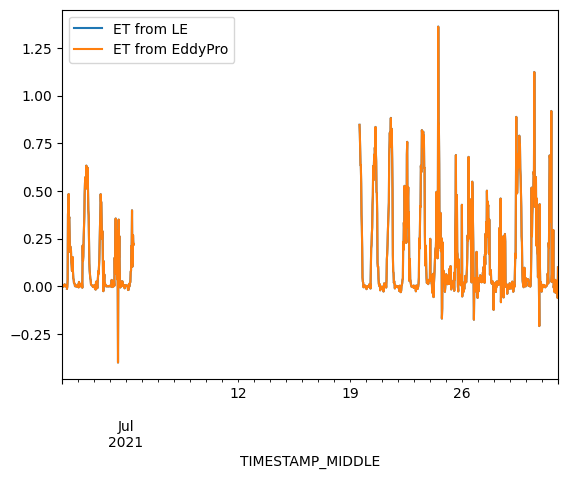

In [7]:
et.plot(label="ET from LE")
et_from_ep.plot(label="ET from EddyPro")
plt.legend()
plt.show()

</br>

# **Plot some variables**

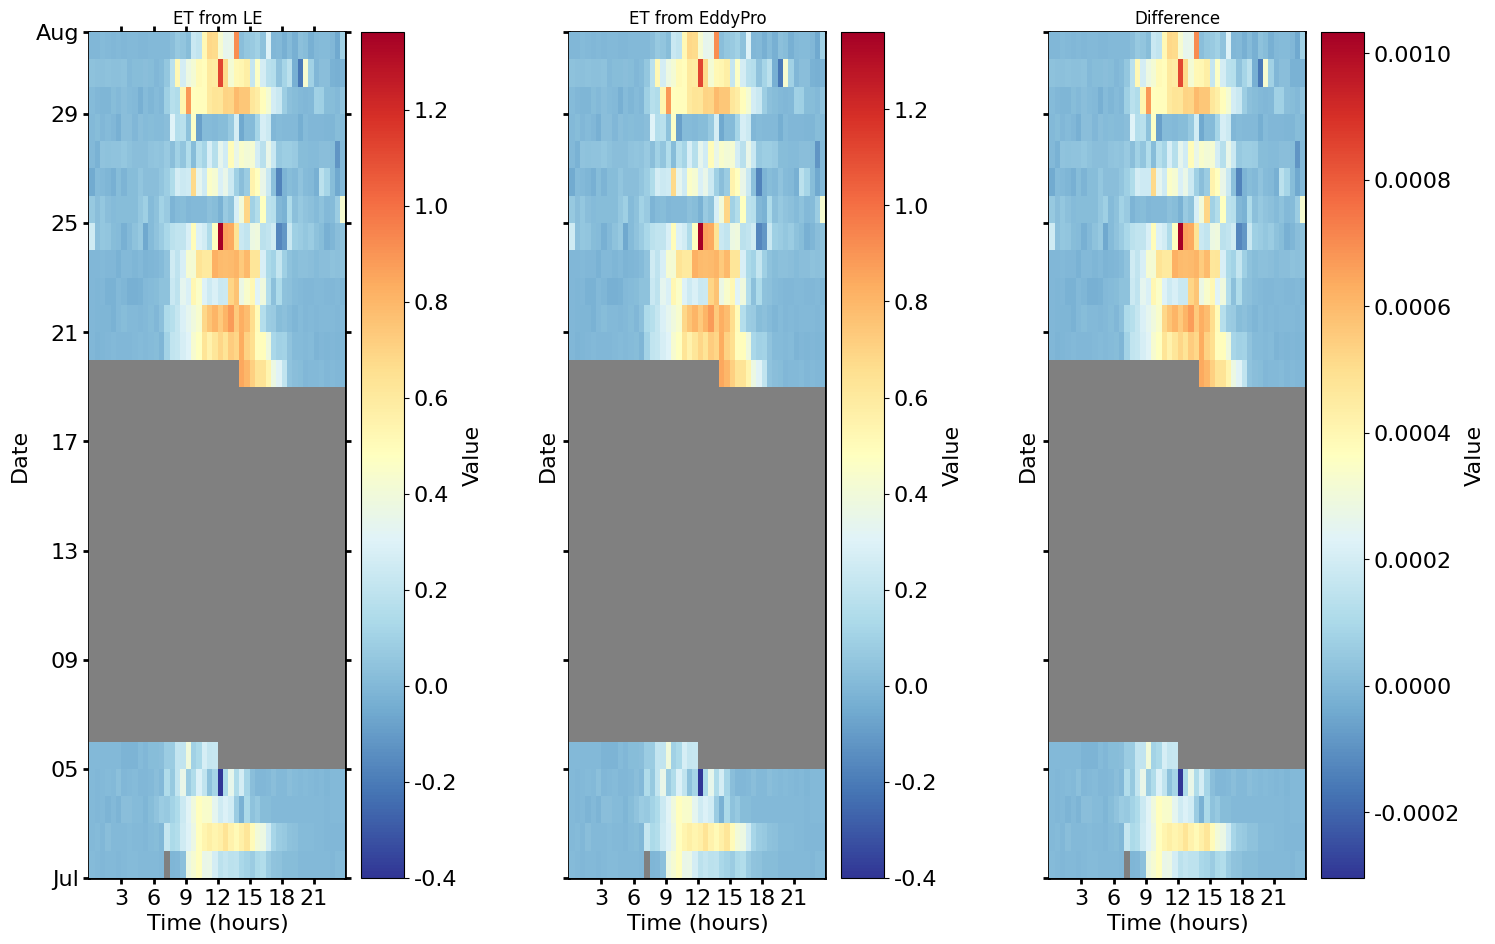

In [8]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.5, hspace=0.1, left=0.1, right=0.9, top=0.97, bottom=0.03)
ax_et_from_le = fig.add_subplot(gs[0, 0])
ax_et_from_ep = fig.add_subplot(gs[0, 1])
ax_diff = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_et_from_le, series=et, cb_digits_after_comma=1).plot()
HeatmapDateTime(ax=ax_et_from_ep, series=et_from_ep, cb_digits_after_comma=1).plot()
HeatmapDateTime(ax=ax_diff, series=et.sub(et_from_ep), cb_digits_after_comma=4).plot()
ax_et_from_le.set_title("ET from LE", color='black')
ax_et_from_ep.set_title("ET from EddyPro", color='black')
ax_diff.set_title("Difference", color='black')
ax_et_from_ep.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_diff.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)

</br>

# **End of notebook**

In [9]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-05-16 22:46:25
